In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_excel('../../data_set/hd_sessions/data_labeled.xlsx')

In [6]:
feature_cols = [
    'AP (mmHg)', 'AUF (ml)', 'BFR (ml/min)', 'Dry weight (kg)',
    'HD duration (h)', 'PUF (ml)', 'Post HD weight (kg)',
    'Pre HD weight (kg)', 'TMP (mmHg)', 'VP (mmHg)', 
    'Weight gain (kg)', 'DIA (mmHg)'
]

X = df[feature_cols]
y = df['target']

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3856 entries, 0 to 3855
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AP (mmHg)            3856 non-null   float64
 1   AUF (ml)             3856 non-null   float64
 2   BFR (ml/min)         3856 non-null   float64
 3   Dry weight (kg)      3856 non-null   float64
 4   HD duration (h)      3856 non-null   float64
 5   PUF (ml)             3856 non-null   float64
 6   Post HD weight (kg)  3856 non-null   float64
 7   Pre HD weight (kg)   3856 non-null   float64
 8   TMP (mmHg)           3856 non-null   float64
 9   VP (mmHg)            3856 non-null   int64  
 10  Weight gain (kg)     3856 non-null   float64
 11  DIA (mmHg)           3856 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 361.6 KB


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9948186528497409

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       770
           1       0.25      0.50      0.33         2

    accuracy                           0.99       772
   macro avg       0.62      0.75      0.67       772
weighted avg       1.00      0.99      1.00       772



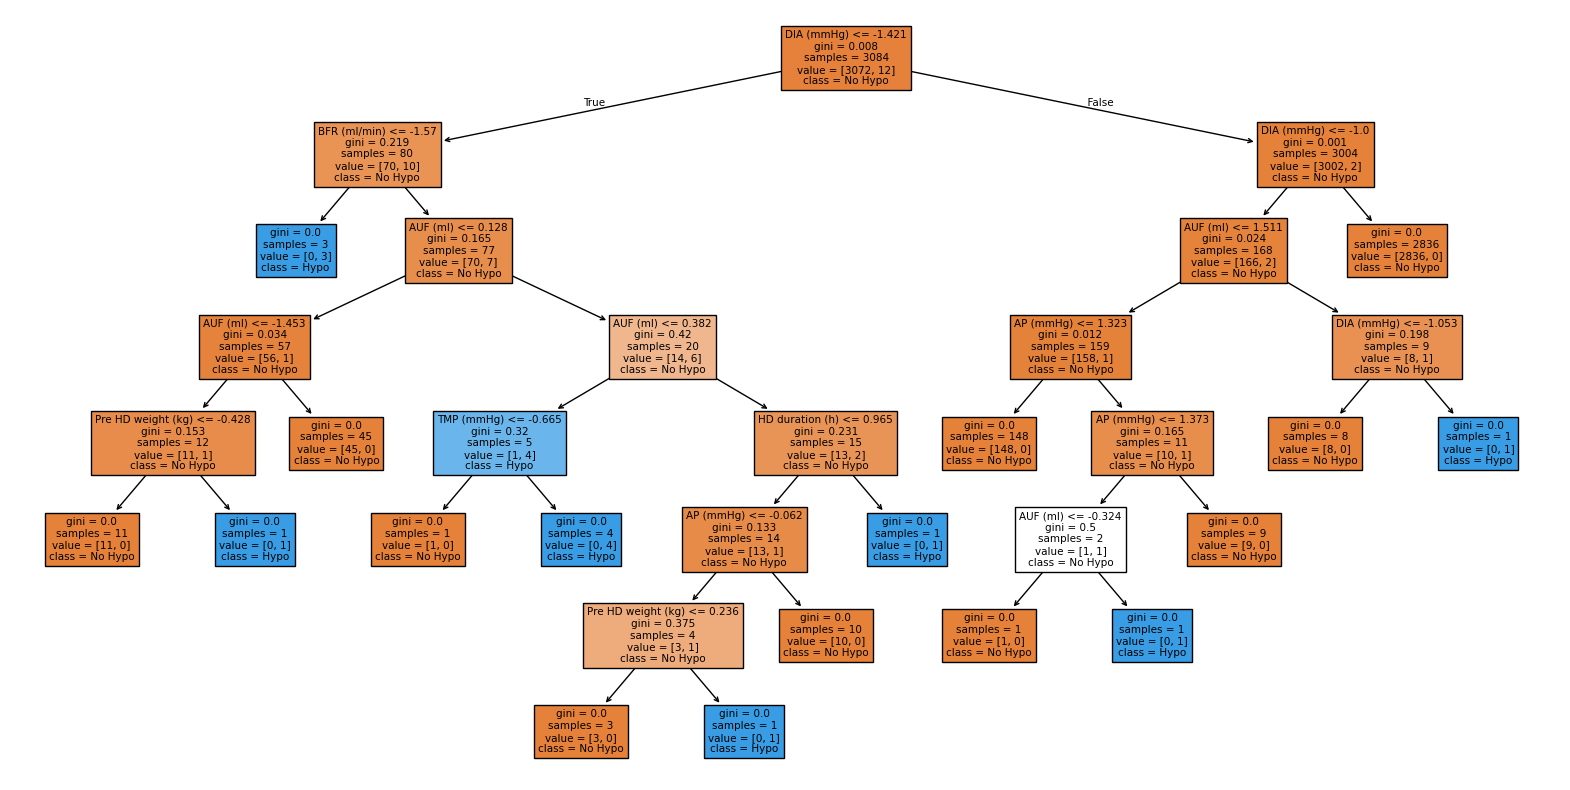

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=feature_cols, class_names=["No Hypo", "Hypo"], filled=True)
plt.show()